In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd "/content/drive/MyDrive/binGPT tests/binGPT"
%pwd

In [ ]:
!python --version

In [ ]:
!pip install -e .

In [ ]:
model_dir = "./models/binary/"

import os
# check is dir exist if not create it
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

In [ ]:
%ls

In [1]:

from utils.tentmapdataset import TentDataset

# print an example instance of the dataset
n = 4
length = 22
train_dataset = TentDataset(
    "train",
    length=length,
    n_iterations=n,
)  # , type="decimal"
test_dataset = TentDataset(
    "test",
    length=length,
    n_iterations=n,
)  # , type="decimal"

x, y = train_dataset[0]

print("x:", x)
print("y:", y)

x, y = test_dataset[0]

print("x:", x)
print("y:", y)


x: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
y: tensor([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0])
x: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
y: tensor([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  0,  0,  0,  0,  0,  0])


In [2]:

# create a GPT instance
from mingpt.model import GPT
from mingpt.utils import CfgNode as CN

model_config = CN(
    n_layer=3,
    n_head=3,
    n_embd=2**4 * 3,
    model_type=None,
    vocab_size=train_dataset.get_vocab_size(),
    block_size=train_dataset.get_block_size(),
    embd_pdrop=0.1,
    attn_pdrop=0.1,
    resid_pdrop=0.1,
)

model = GPT(model_config)

print(f"Number of training samples: {len(train_dataset):.3e}")
print(f"Number of test samples: {len(test_dataset):.3e}")



number of parameters: 8.707e+04
Number of training samples: 3.146e+06
Number of test samples: 1.049e+06


In [ ]:
import torch
import os

print("Loading model from disk...")
model.load_state_dict(
    torch.load(
        os.path.join(
            model_dir,
            "model.pt",
        ),
        map_location=torch.device("cpu"),
    )
)


Loading model from disk...


<All keys matched successfully>

In [4]:

# get the weights of the model
weights = model.state_dict()
print("Weights loaded from disk.")
print("Number of weights:", len(weights))
print("Weights:", weights.keys())
print("Weights shapes:")
for k, v in weights.items():
    print(f"{k}: {v.shape}")


Weights loaded from disk.
Number of weights: 44
Weights: odict_keys(['transformer.wte.weight', 'transformer.wpe.weight', 'transformer.h.0.ln_1.weight', 'transformer.h.0.ln_1.bias', 'transformer.h.0.attn.bias', 'transformer.h.0.attn.c_attn.weight', 'transformer.h.0.attn.c_attn.bias', 'transformer.h.0.attn.c_proj.weight', 'transformer.h.0.attn.c_proj.bias', 'transformer.h.0.ln_2.weight', 'transformer.h.0.ln_2.bias', 'transformer.h.0.mlp.c_fc.weight', 'transformer.h.0.mlp.c_fc.bias', 'transformer.h.0.mlp.c_proj.weight', 'transformer.h.0.mlp.c_proj.bias', 'transformer.h.1.ln_1.weight', 'transformer.h.1.ln_1.bias', 'transformer.h.1.attn.bias', 'transformer.h.1.attn.c_attn.weight', 'transformer.h.1.attn.c_attn.bias', 'transformer.h.1.attn.c_proj.weight', 'transformer.h.1.attn.c_proj.bias', 'transformer.h.1.ln_2.weight', 'transformer.h.1.ln_2.bias', 'transformer.h.1.mlp.c_fc.weight', 'transformer.h.1.mlp.c_fc.bias', 'transformer.h.1.mlp.c_proj.weight', 'transformer.h.1.mlp.c_proj.bias', 'tran

Weight distribution:
transformer.wte.weight: mean: -0.00, std: 0.02
transformer.wpe.weight: mean: 0.00, std: 0.08
transformer.h.0.ln_1.weight: mean: 1.12, std: 0.05
transformer.h.0.attn.c_attn.weight: mean: 0.00, std: 0.06
transformer.h.0.attn.c_proj.weight: mean: -0.00, std: 0.02
transformer.h.0.ln_2.weight: mean: 1.01, std: 0.03
transformer.h.0.mlp.c_fc.weight: mean: -0.00, std: 0.02
transformer.h.0.mlp.c_proj.weight: mean: 0.00, std: 0.01
transformer.h.1.ln_1.weight: mean: 1.19, std: 0.04
transformer.h.1.attn.c_attn.weight: mean: 0.00, std: 0.08
transformer.h.1.attn.c_proj.weight: mean: 0.00, std: 0.02
transformer.h.1.ln_2.weight: mean: 1.04, std: 0.04
transformer.h.1.mlp.c_fc.weight: mean: 0.00, std: 0.03
transformer.h.1.mlp.c_proj.weight: mean: 0.00, std: 0.02
transformer.h.2.ln_1.weight: mean: 1.09, std: 0.03
transformer.h.2.attn.c_attn.weight: mean: -0.00, std: 0.06
transformer.h.2.attn.c_proj.weight: mean: -0.00, std: 0.02
transformer.h.2.ln_2.weight: mean: 1.07, std: 0.03
tran

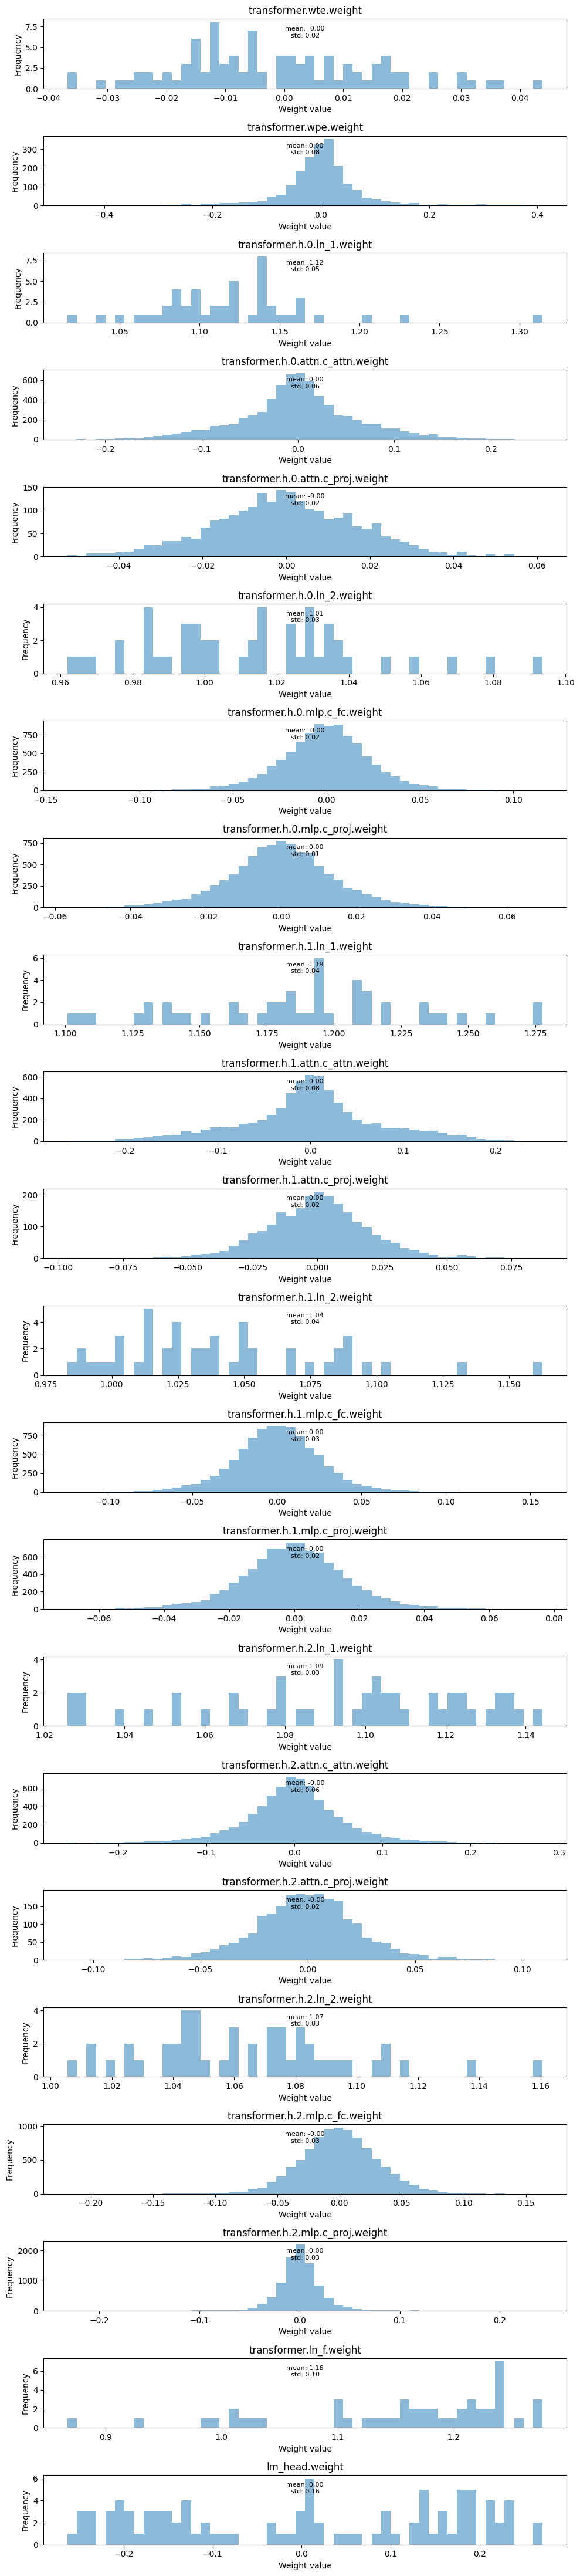

In [5]:

# plot the distribution of weights in each layer
import matplotlib.pyplot as plt

n_plots = 0

for k, v in weights.items():
    if "weight" in k:
        n_plots += 1

weight_dist = {}
fig, ax = plt.subplots(n_plots, 1, figsize=(10, n_plots * 2))
count = 0
for k, v in weights.items():
    if "weight" in k:
        ax_idx = count
        count += 1
        ax[ax_idx].hist(v.flatten(), bins=50, alpha=0.5)
        ax[ax_idx].set_title(k)
        ax[ax_idx].set_xlabel("Weight value")
        ax[ax_idx].set_ylabel("Frequency")

        mean = v.mean()
        std = v.std()
        weight_dist[k] = (mean, std)
        # add mean and std to the plot in text
        ax[ax_idx].text(
            0.5,
            0.9,
            f"mean: {mean:.2f}\nstd: {std:.2f}",
            transform=ax[ax_idx].transAxes,
            ha="center",
            va="top",
            fontsize=8,
        )
plt.tight_layout()

print("Weight distribution:")
for k, v in weight_dist.items():
    print(f"{k}: mean: {v[0]:.2f}, std: {v[1]:.2f}")


Text(0.5, 1.0, 'transformer.h.2.attn.c_attn.weight')

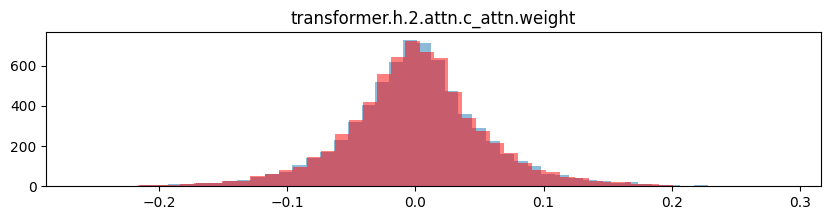

In [6]:

selected_components = "transformer.h.2.attn.c_attn.weight"
fig, ax = plt.subplots(figsize=(10, 2))
# plot the distribution of the selected component
ax.hist(weights[selected_components].flatten(), bins=50, alpha=0.5)
# give a small perturbation to the weights of the selected components
perturbation = weight_dist[selected_components][1] * 0.1
tmp = weights[selected_components] + perturbation * torch.randn(
    weights[selected_components].shape
)
ax.hist(tmp.flatten(), bins=50, alpha=0.5, color="red")
ax.set_title(selected_components)



In [7]:

from torch.utils.data.dataloader import DataLoader


def eval_split(model, split, max_batches, device):
    dataset = {
        "train": train_dataset,
        "test": test_dataset,
    }[split]
    n = train_dataset.length
    results = []
    # mistakes = []
    incorrect_preds = []
    correct_preds = []
    mistakes_printed_already = 0
    loader = DataLoader(
        dataset,
        batch_size=5000,
        num_workers=0,
        drop_last=False,
    )
    for b, (x, y) in enumerate(loader):
        x = x.to(device)
        y = y.to(device)
        # isolate the input pattern alone
        inp = x[:, :n]
        sol = y[:, -n:]
        # let the model sample the rest of the sequence
        cat = model.generate(
            inp, n, do_sample=False
        )  # using greedy argmax, not sampling
        sol_candidate = cat[:, n:]  # isolate the filled in sequence
        # compare the predicted sequence to the true sequence
        correct = (sol == sol_candidate).all(1).cpu()
        for i in range(x.size(0)):
            results.append(int(correct[i]))
            if (
                not correct[i] and "".join(map(str, inp[i].tolist())) not in mistakes
            ):  # and mistakes_printed_already < 3  # only print up to 5 mistakes to get a sense
                mistakes_printed_already += 1
                # mistakes.append("".join(map(str, inp[i].tolist())))
                print(
                    "GPT claims that %s -> %s but g.t. is %s"
                    % (inp[i].tolist(), sol_candidate[i].tolist(), sol[i].tolist())
                )
                incorrect_preds.append(
                    (inp[i].tolist(), sol_candidate[i].tolist(), sol[i].tolist())
                )
            else:
                correct_preds.append(
                    (inp[i].tolist(), sol_candidate[i].tolist(), sol[i].tolist())
                )
        if max_batches is not None and b + 1 >= max_batches:
            break
    rt = torch.tensor(results, dtype=torch.float)
    print(
        "%s final score: %d/%d = %.2f%% correct"
        % (split, rt.sum(), len(results), 100 * rt.mean())
    )
    return correct_preds, incorrect_preds



In [ ]:
import numpy as np

eval_type = "test"

with torch.no_grad():
    results = eval_split(
        model,
        eval_type,
        max_batches=None,
        device="cuda" if torch.cuda.is_available() else "cpu",
    )

_, incorrect_preds = results

# save correct_preds
np.save(os.path.join(model_dir, f"{eval_type} incorrect_preds_perturbed.npy"), incorrect_preds)
